In [44]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix

In [31]:
df = pd.read_csv('4.1LCleaned.csv')
len(df)

416809

In [32]:
df.head()

,Unnamed: 0,text,emotions,sentiment,polarity
0,27383,feel awful job get position succeed happen,sadness,-1.0,-0.4404
1,110083,im alone feel awful,sadness,-1.0,-0.4404
2,140764,ive probably mentioned really feel proud actua...,joy,1.0,0.5859
3,100071,feeling little low days back,sadness,-1.0,-0.4404
4,2837,beleive much sensitive peoples feelings tend c...,love,1.0,0.6369


In [33]:
x = df['text']
y = df['emotions']

In [34]:
cv = CountVectorizer()

In [37]:
%%time
x_vectorized = cv.fit_transform(x.apply(lambda x: np.str_(x)))

pickle.dump(cv, open('vectorizer.pkl','wb'))

CPU times: user 5.27 s, sys: 245 ms, total: 5.52 s
Wall time: 6.24 s


In [14]:
df_split = train_test_split(x_vectorized, y, train_size = 0.9, random_state = 42)

In [15]:
x_train = df_split[0]
x_test = df_split[1]
y_train = df_split[2]
y_test = df_split[3]

In [16]:
nb = MultinomialNB()

In [17]:
%%time
nb.fit(x_train, y_train)

CPU times: user 1.8 s, sys: 32.2 ms, total: 1.83 s
Wall time: 1.85 s


MultinomialNB()

In [18]:
nb.score(x_test,y_test)

0.8693889302080084

In [38]:
%%time
vector = cv.transform(['the painting looks scary owing to random colors distributed without meaning']).toarray()

CPU times: user 681 µs, sys: 157 µs, total: 838 µs
Wall time: 754 µs


In [22]:
 nb.predict(vector)

array(['fear'], dtype='<U8')

In [20]:
lr = LogisticRegression(max_iter = 1500)

In [42]:
%%time
lr.fit(x_train, y_train)

pickle.dump(lr,open('lr.pkl','wb'))

CPU times: user 3min 35s, sys: 30 s, total: 4min 5s
Wall time: 2min 32s


In [23]:
lr.score(x_test,y_test)

0.8831601928936446

In [24]:
lr.predict(vector)

array(['anger'], dtype=object)

In [25]:
import pickle
nb_model = open("nb.pkl","wb")
pickle.dump(nb,nb_model)
nb_model.close()

In [39]:
nb.predict(cv.transform(['text']))

array(['joy'], dtype='<U8')

In [40]:
lr.predict(cv.transform(['text']))

array(['joy'], dtype=object)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


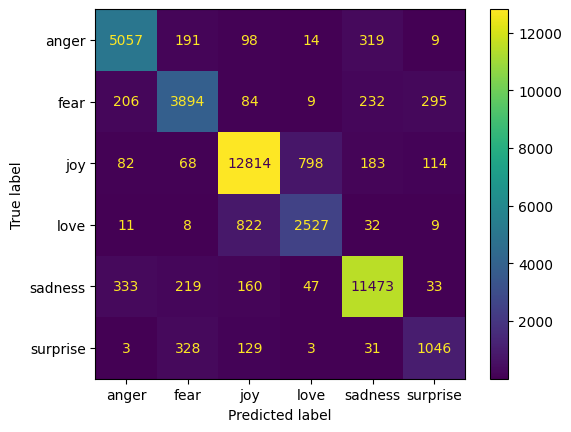

In [48]:
plot_confusion_matrix(lr, x_test, y_test)